In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **PART A**

In [ ]:
data = pd.read_csv('customer_raw_data_1500.csv', index_col=False)
print(data)

     Customer_ID  Age   Gender         City    Income Customer_Since  \
0       CUST1000   68  Unknown     new york   $93,792     2022-02-16   
1       CUST1001   43     MALE  Los Angeles  $138,681     23/09/2022   
2       CUST1002   73     MALE       Huston   $30,858     30/07/2022   
3       CUST1003   25   FEMALE     new york  $138,103     2022-05-02   
4       CUST1004   72   FeMale      Unknown  $103,229     2022-08-30   
...          ...  ...      ...          ...       ...            ...   
1495    CUST2495   78   female     New York   $42,001     2023-01-25   
1496    CUST2496   33   FeMale      Houston   $63,038   Dec 29, 2023   
1497    CUST2497   45    Other       Huston   $75,659     2022-09-23   
1498    CUST2498   84     Male      Unknown   $66,664     2023-09-03   
1499    CUST2499   -5     MALE      Houston   $56,435   May 01, 2023   

      Spending_Score  
0               79.0  
1               74.0  
2               32.0  
3               36.0  
4               83.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     1500 non-null   object 
 1   Age             1500 non-null   int64  
 2   Gender          1500 non-null   object 
 3   City            1500 non-null   object 
 4   Income          1370 non-null   object 
 5   Customer_Since  1500 non-null   object 
 6   Spending_Score  1482 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 82.2+ KB


In [ ]:
data.describe()

,Age,Spending_Score
count,1500.000000,1482.000000
mean,53.431333,49.843455
std,25.251846,29.282919
min,-5.000000,1.000000
25%,34.000000,24.000000
50%,53.000000,48.000000
75%,72.000000,76.000000
max,150.000000,100.000000


**1. Identify and Handle missing value**

In [ ]:
data.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income,130
Customer_Since,0
Spending_Score,18


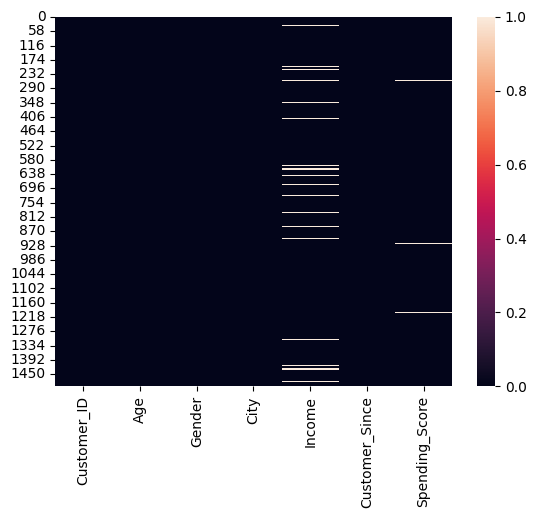

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
#for col in data:
    #plt.hist(data[col])
    #plt.title("Histogram of {} column".format(col))
    #plt.xlabel(col)
    #plt.ylabel("count")
    #plt.show()

filling missing data with median

In [ ]:
data['Spending_Score'] = data['Spending_Score'].fillna(data['Spending_Score'].median())

filling missing data with mode

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].mode()[0])

In [ ]:
data.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income,0
Customer_Since,0
Spending_Score,0


**2. Fix Inconsistent data Format**

In [ ]:
# Standardizing Data Formats
# Converting Customer_Since to datetime
data['Customer_Since'] = pd.to_datetime(data['Customer_Since'], errors='coerce')

In [ ]:
# Converting Income to numeric
data['Income'] = data['Income'].str.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
print(data.dtypes)

Customer_ID               object
Age                        int64
Gender                    object
City                      object
Income                   float64
Customer_Since    datetime64[ns]
Spending_Score           float64
dtype: object


In [ ]:
data

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,new york,93792.0,2022-02-16,79.0
1,CUST1001,43,MALE,Los Angeles,138681.0,NaT,74.0
2,CUST1002,73,MALE,Huston,30858.0,NaT,32.0
3,CUST1003,25,FEMALE,new york,138103.0,2022-05-02,36.0
4,CUST1004,72,FeMale,Unknown,103229.0,2022-08-30,83.0
...,...,...,...,...,...,...,...
1495,CUST2495,78,female,New York,42001.0,2023-01-25,54.0
1496,CUST2496,33,FeMale,Houston,63038.0,NaT,77.0
1497,CUST2497,45,Other,Huston,75659.0,2022-09-23,75.0
1498,CUST2498,84,Male,Unknown,66664.0,2023-09-03,39.0


**3. Handle categorical data**

In [ ]:
# Standardizing Inconsistent Category Gender
data['Gender'] = data['Gender'].str.lower().str.title().replace({
    'Male': 'Male',
    'Female': 'Female',
    'Other': 'Other',
    'Unknown': 'Unknown'
})


In [ ]:
# Standardizing Inconsistent Category City
data['City'] = data['City'].str.lower().str.title().replace({
    'New York': 'New York',
    'Huston': 'Houston',
    'Los Angeles': 'Los Angeles',
    'Unknown': 'Unknown'
})

In [ ]:
# Removing Invalid/Outlier Entries
data = data[(data['Age'] > 0) & (data['Age'] <= 100)]
data = data[data['City'] != 'Unknown']
data = data[data['Gender'] != 'Unknown']

In [ ]:
data

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
1,CUST1001,43,Male,Los Angeles,138681.0,NaT,74.0
2,CUST1002,73,Male,Houston,30858.0,NaT,32.0
3,CUST1003,25,Female,New York,138103.0,2022-05-02,36.0
5,CUST1005,83,Female,New York,105486.0,NaT,35.0
6,CUST1006,33,Female,Los Angeles,24485.0,2022-12-07,7.0
...,...,...,...,...,...,...,...
1493,CUST2493,64,Female,New York,72430.0,NaT,36.0
1494,CUST2494,30,Male,Houston,135289.0,NaT,52.0
1495,CUST2495,78,Female,New York,42001.0,2023-01-25,54.0
1496,CUST2496,33,Female,Houston,63038.0,NaT,77.0


**4. Remove duplicates and obvious data errors**

In [ ]:
duplicate_ids = data.duplicated('Customer_ID', keep=False)
print(f"Found {duplicate_ids.sum()} duplicate Customer IDs")

Found 8 duplicate Customer IDs


In [ ]:
# Remove duplicates (keeping first occurrence)
data = data.drop_duplicates('Customer_ID', keep='first')

In [ ]:
data

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
1,CUST1001,43,Male,Los Angeles,138681.0,NaT,74.0
2,CUST1002,73,Male,Houston,30858.0,NaT,32.0
3,CUST1003,25,Female,New York,138103.0,2022-05-02,36.0
5,CUST1005,83,Female,New York,105486.0,NaT,35.0
6,CUST1006,33,Female,Los Angeles,24485.0,2022-12-07,7.0
...,...,...,...,...,...,...,...
1493,CUST2493,64,Female,New York,72430.0,NaT,36.0
1494,CUST2494,30,Male,Houston,135289.0,NaT,52.0
1495,CUST2495,78,Female,New York,42001.0,2023-01-25,54.0
1496,CUST2496,33,Female,Houston,63038.0,NaT,77.0


## **PART B**

**1. Summarize the dataset**

In [ ]:
# Mean, median, and mode of age and income.
age = {
    'Mean': data['Age'].mean(),
    'Median': data['Age'].median(),
    'Mode': data['Age'].mode()[0]  # Returns first mode if multiple exist
}

# For Income (after cleaning $ symbols)
income = {
    'Mean': data['Income'].mean(),
    'Median': data['Income'].median(),
    'Mode': data['Income'].mode()[0]
}

pd.DataFrame([age, income], index=['Age', 'Income'])

,Mean,Median,Mode
Age,52.544351,52.0,76.0
Income,86030.084034,89036.0,105486.0


In [ ]:
# Distribution of customers across cities and genders.
gender = data['Gender'].value_counts(normalize=True) * 100
city = data['City'].value_counts(normalize=True) * 100


In [ ]:
print("Gender Distribution:")
print(gender)
print("\nCity Distribution:")
print(city)

Gender Distribution:
Gender
Female    47.899160
Male      34.453782
Other     17.647059
Name: proportion, dtype: float64

City Distribution:
City
Los Angeles    34.173669
New York       33.333333
Houston        32.492997
Name: proportion, dtype: float64


**2. Insights generation**

In [ ]:
# Calculate average spending by age group
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 55, 100], labels=['<30', '30-55', '55+'])
age_spending = data.groupby('Age_Group')['Spending_Score'].mean()
print(age_spending)

Age_Group
<30      48.665072
30-55    48.878378
55+      50.985772
Name: Spending_Score, dtype: float64


<ipython-input-25-21d67fe4c58e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 55, 100], labels=['<30', '30-55', '55+'])
<ipython-input-25-21d67fe4c58e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = data.groupby('Age_Group')['Spending_Score'].mean()


Older consumers could have more secure finances and are potentially more loyal to the brands they choose.

In [ ]:
city_stats = data.groupby('City').agg({'Income':'mean', 'Spending_Score':'mean'})

In [ ]:
print(city_stats)

                   Income  Spending_Score
City                                     
Houston      88327.416667       52.051724
Los Angeles  85825.781421       48.868852
New York     84000.120448       48.574230


While Houston customers demonstrate a higher ability to spend, their actual spending amounts are not comparatively larger.

In [ ]:
data.groupby('Gender').agg({'Income':'mean', 'Spending_Score':'mean'})

,Income,Spending_Score
Gender,,
Female,85580.918129,49.079922
Male,86076.585366,51.195122
Other,87158.460317,49.058201


When considering product choices and loyalty strategies, it's important to recognize that men may have unique priorities and responses.

<ipython-input-29-65e516979e80>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_Group', y='Spending_Score', data=data, ci=None)


Text(0.5, 1.0, 'Spending Score by Age Group')

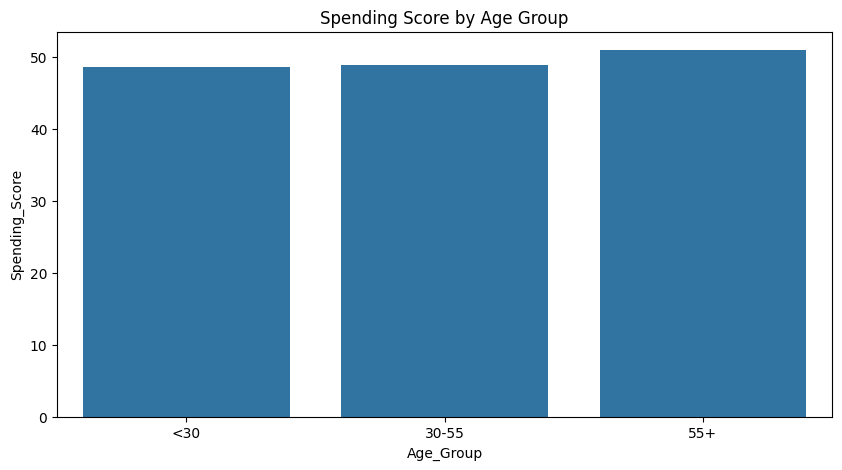

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Spending_Score', data=data, ci=None)
plt.title("Spending Score by Age Group")

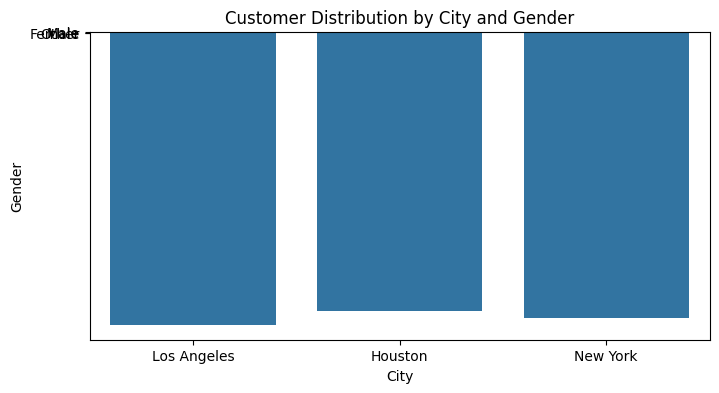

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='City', y='Gender', data=data, estimator=len)  # or estimator=np.sum for count
plt.title("Customer Distribution by City and Gender")
plt.show()

**3. Data issues you noticed**

In [ ]:
data[(data['Age'] <= 30) & (data['Income'] > 130000)]

# Low-spending high-income seniors
data[(data['Age'] >= 70) & (data['Income'] > 100000) & (data['Spending_Score'] < 50)]

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Age_Group
5,CUST1005,83,Female,New York,105486.0,NaT,35.0,55+
17,CUST1017,88,Male,New York,128272.0,NaT,20.0,55+
40,CUST1040,82,Male,Los Angeles,106673.0,2022-09-24,16.0,55+
56,CUST1056,74,Male,Houston,147230.0,NaT,12.0,55+
155,CUST1155,73,Other,Houston,116801.0,NaT,14.0,55+
...,...,...,...,...,...,...,...,...
1336,CUST2336,77,Male,New York,132470.0,2022-03-04,22.0,55+
1416,CUST2416,74,Other,Los Angeles,122620.0,NaT,49.0,55+
1435,CUST2435,79,Male,Los Angeles,144925.0,NaT,12.0,55+
1447,CUST2447,70,Female,Los Angeles,122784.0,2023-03-19,49.0,55+


Retirees, defined as those 55+ years and older with incomes of $100,000 or more, display a tendency for restrained spending

In [ ]:
data.groupby('City').agg({'Income': ['mean', 'median'],
                       'Spending_Score': 'mean'})

Income          Spending_Score
                     mean   median           mean
City                                             
Houston      88327.416667  91434.5      52.051724
Los Angeles  85825.781421  90830.0      48.868852
New York     84000.120448  88395.0      48.574230

Houston has the highest mean/median income but lowest spending scores

Los Angles and NewYork incomes are suspiciously close (~85Kvs.85Kvs.84K) despite Newyork higher cost of living.



In [ ]:
# save to csv
csv_file = 'Cleaned_data_Preprocessing_and_EDA.csv'
data.to_csv(csv_file, index=False)
print(f"Successfully saved cleaned data to {csv_file}")

Successfully saved cleaned data to Cleaned_data_Preprocessing_and_EDA.csv
